# Finance Podcasts on Spotify

### A look at finance podcasts on Spotify, using data downloaded with the help of the [Spotify](https://developer.spotify.com/) API 

In [1]:
import time
import pandas as pd
import numpy as np
import json,requests
import urllib.parse
import spotipy.util as util
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
print("Done")

Done


In [2]:
pwd

'/Users/sukanto/Google Drive/allprojects/Spot_Pod'

In [3]:
cid = 'xxxxxxxxxxxxx' #your API credentials
secret = 'xxxxxxxxxxx'
username = 'xxxxxxxxxx' #same as your Spotify listener username
scope = 'playlist-modify-public playlist-modify'
redirect_uri = 'https://developer.spotify.com/dashboard/applications/4c13d3b748d34cdf9729a35f47f8e947'
token = util.prompt_for_user_token(client_id=cid,
                                   username=username,
                                   client_secret=secret,
                                   redirect_uri=redirect_uri,
                                   scope=scope)

In [4]:
search = 'personal finance' #define your search term
endpoint_url = 'https://api.spotify.com/v1/search?'

In [5]:
show_name = [] #initialise empty lists for the data points
id_list = []
desc_list = []
language_list = []
publisher_list = []

type = 'show'
market = 'IN'
limit = 50
offset = 0

do_more = 1
counter = 0

tic = time.time()
while ((offset <= 1950) & (counter <= do_more)): #do a while loop, but ensure your code doesn't break
    try:
        query = f'{endpoint_url}'
        query += f'&q={search}'
        query += f'&type={type}'
        query += f'&offset={offset}'
        query += f'&market={market}'
        query += f'&limit={limit}'

    except:
        print("Oh no! Can't go on like this")

    response = requests.get(query,                                           # get request
                   headers={"Content-Type":"application/json",
                            "Authorization":f"Bearer {token}"})
    json_response = response.json()

    for i in range(len(json_response['shows']['items'])):                      # loop through json

        id_list.append(json_response['shows']['items'][i]['id'])               # pull out info from json
        show_name.append(json_response['shows']['items'][i]['name'])           # into empty lists
        desc_list.append(json_response['shows']['items'][i]['description'])
        language_list.append(json_response['shows']['items'][i]['languages'])
        publisher_list.append(json_response['shows']['items'][i]['publisher'])



    do_more = (json_response['shows']['total'] // 50 )            # how many more runs of 50 are needed?

    counter += 1                                                    # increase conditional counter by 1

    offset = offset + 50

podcasts = pd.DataFrame()

podcasts['id'] = id_list
podcasts['name'] = show_name
podcasts['description'] = desc_list
podcasts['languages'] = language_list
podcasts['publisher'] = publisher_list

podcasts.to_csv('podcasts_finance.csv')


toc = time.time() - tic #while a track or podcast plays on Spotify

print("Time taken to do this %s seconds"%(toc))

Time taken to do this 43.559277057647705 seconds


In [6]:
df = pd.read_csv('podcasts_finance.csv',index_col=0)
df.head()

,id,name,description,languages,publisher
0,00c2RTj9h2Hk0j0u5yenZQ,FINANZAS PERSONALES y LIBERTAD FINANCIERA,¿QUIERES LOGRAR LIBERTAD FINANCIERA? ¿QUIERES ...,['es'],Pedro Castre
1,5PR7eF0Ar6JfTrc6uzuPa7,"ANTI MONEY MONEY CLUB: Aktien, Investieren & P...",Willkommen im AMMC - Dein Podcast für Personal...,['de'],Phil & Domme
2,5rlksOLniypAgBEkebMkoo,Rich Dad Radio Show: In-Your-Face Advice on In...,"Beat conventional advice on personal finance, ...",['en'],The Rich Dad Radio Network
3,54VydTdMDHkfqPqzlwRJFa,Listen Money Matters - Free your inner financi...,Honest and uncensored - this is not your fathe...,['en'],ListenMoneyMatters.com | Andrew Fiebert and Ma...
4,2ONV8pEFIMeb8Onzg5qs8D,Stock Market & Personal Finance by Neeraj Arora,A series dedicated to stock market and persona...,['hi'],stockmarketandpersonalfinance


In [7]:
df.shape

(1966, 5)

In [8]:
pod_lang = df['languages'].value_counts()
pod_lang

['en']       1333
['en-US']     232
['es']        187
['fr']         51
['es-MX']      23
['en-GB']      18
['hi']         18
['en-AU']      16
['pt']         10
['de']          8
['en-CA']       7
['id']          6
['it']          4
['tl']          4
['ta']          4
['fr-FR']       3
['ro']          3
['de-DE']       3
['es-PE']       3
['fr-CA']       3
['es-CL']       2
['es-ES']       2
['es-CO']       2
['es-PR']       2
['pt-BR']       2
['nl']          2
['und']         1
['es-EC']       1
['es-GT']       1
['es-CR']       1
['ja']          1
['es-AR']       1
['bn']          1
['en-ZA']       1
['aa']          1
['sv-SE']       1
['es-DO']       1
['en-PH']       1
['es-US']       1
['ur']          1
['en-IE']       1
['sw']          1
['ml']          1
['pt-PT']       1
Name: languages, dtype: int64

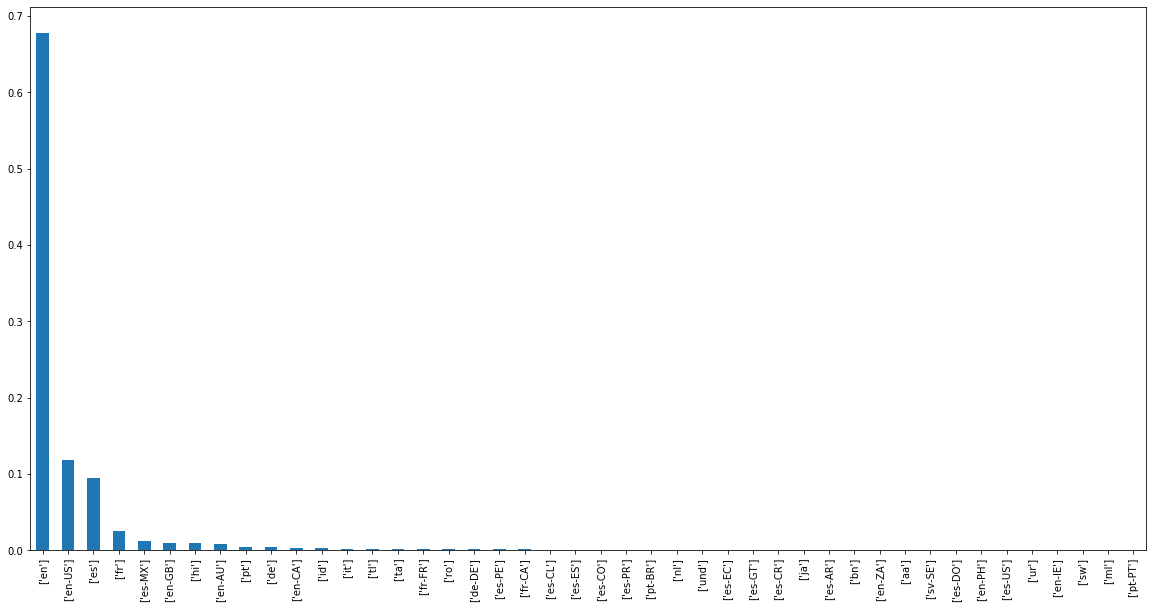

In [9]:
plt.figure(figsize=(20,10))
(pod_lang/df.shape[0]).plot(kind='bar');

In [10]:
en_podcasts = pd.DataFrame()
en_podcasts = df[df.apply(lambda x: 'en' in x['languages'], axis=1)]

en_podcasts_us = pd.DataFrame()
en_podcasts_us = df[df.apply(lambda x: 'en-US' in x['languages'], axis=1)]

en_podcasts_gb = pd.DataFrame()
en_podcasts_gb = df[df.apply(lambda x: 'en-GB' in x['languages'], axis=1)]

en_podcasts = en_podcasts.append(en_podcasts_us)
en_podcasts = en_podcasts.append(en_podcasts_gb)

en_podcasts.to_csv('en_podcasts.csv')

en_podcasts

,id,name,description,languages,publisher
2,5rlksOLniypAgBEkebMkoo,Rich Dad Radio Show: In-Your-Face Advice on In...,"Beat conventional advice on personal finance, ...",['en'],The Rich Dad Radio Network
3,54VydTdMDHkfqPqzlwRJFa,Listen Money Matters - Free your inner financi...,Honest and uncensored - this is not your fathe...,['en'],ListenMoneyMatters.com | Andrew Fiebert and Ma...
5,6o8lC0CcRlIclZsbkEOaRL,Optimal Finance Daily,Why bother searching for the best blogs about ...,['en'],Dan | Optimal Living Daily
7,3oW8SnmePemy5pOsTTvQjY,Self Help for Life Podcast: Self-Improvement |...,Paul Thomas from the Self Help for Life blog s...,['en-GB'],"Paul Thomas : Clinical Hypnotherapist, Life an..."
8,49an3JD6uAaqEw5qQS8tie,My Personal Finances PodCat,PodCat is a weekly financial podcast helping y...,['en'],My Personal Finances
...,...,...,...,...,...
1666,4y8YC68zrpbbiSdjEGtJuX,Sawaneh Talks,"Ebrima is a fellow of ACCA, investment banker ...",['en-GB'],Ebrima Sawaneh
1770,0fgfGMTalbACCUkeGTJKrH,"The ""Money Matters"" Podcast",Since 2005 Solution Loans has been helping peo...,['en-GB'],Solution Loans
1794,4kNCAK7bOO9ooh7PKiqL0r,Future-Proofing you and your business,This podcast shares Executive Consulting and L...,['en-GB'],Kevin Purves
1808,4QHwcaIMpGRsQP8stCyMbi,Finance with JCL,"My channel is for personal finance management,...",['en-GB'],Jason Linsdell


In [11]:
en_podcasts.shape

(1857, 5)

In [12]:
wordset = en_podcasts['description'].unique()
wordset

array(['Beat conventional advice on personal finance, investing, and business with the author of Rich Dad Poor Dad, Robert Kiyosaki. Get ahead with his pull-no-punches style of challenging the advice we’ve all been given on money, investing, and the economy. Frustrated and frightened by the financial advice being given by the mainstream talking heads, Robert Kiyosaki sits down with professionals from the world of money, investing, business, and personal development. Listeners will be provided various viewpoints on how to set themselves up for financial success. If you’re looking for get-rich-quick tips and tricks to investing, move on. Listeners dedicated to the craft of finance and a better life, subscribe! New podcasts released weekly!',
       'Honest and uncensored - this is not your father’s boring finance show. This show brings much needed ACTIONABLE advice to a people who hate being lectured about personal finance from the out-of-touch one percent. Andrew and Matt are relatable,

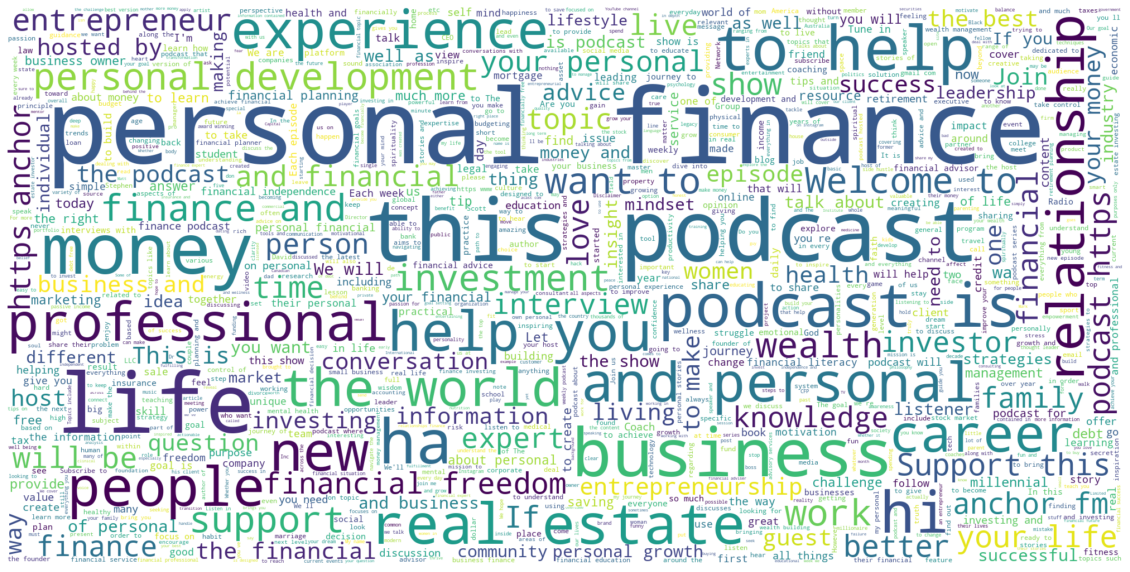

Time taken to generate this wordcloud: 23.82115888595581 seconds


<Figure size 432x288 with 0 Axes>

In [13]:
# build a word cloud

tic = time.time()
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', stopwords=stopwords, 
                      max_words=1000, width=2000, height=1000).generate(' '.join(str(word) for word in wordset))

# display the word cloud

fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('finwords.png');
toc = time.time() - tic
print("Time taken to generate this wordcloud: %s seconds"%(toc))

In [14]:
pubs = en_podcasts['publisher'].value_counts()
pubs[:10]

Ben                                4
The Motley Fool                    4
Alexis Busetti                     3
The Rask Group                     3
Masterlife                         3
Jessica                            3
Esther Szabo                       3
Michelle Blasen                    2
Brandon Matloff and Suneel Garg    2
Rogue Dad, M.D.                    2
Name: publisher, dtype: int64

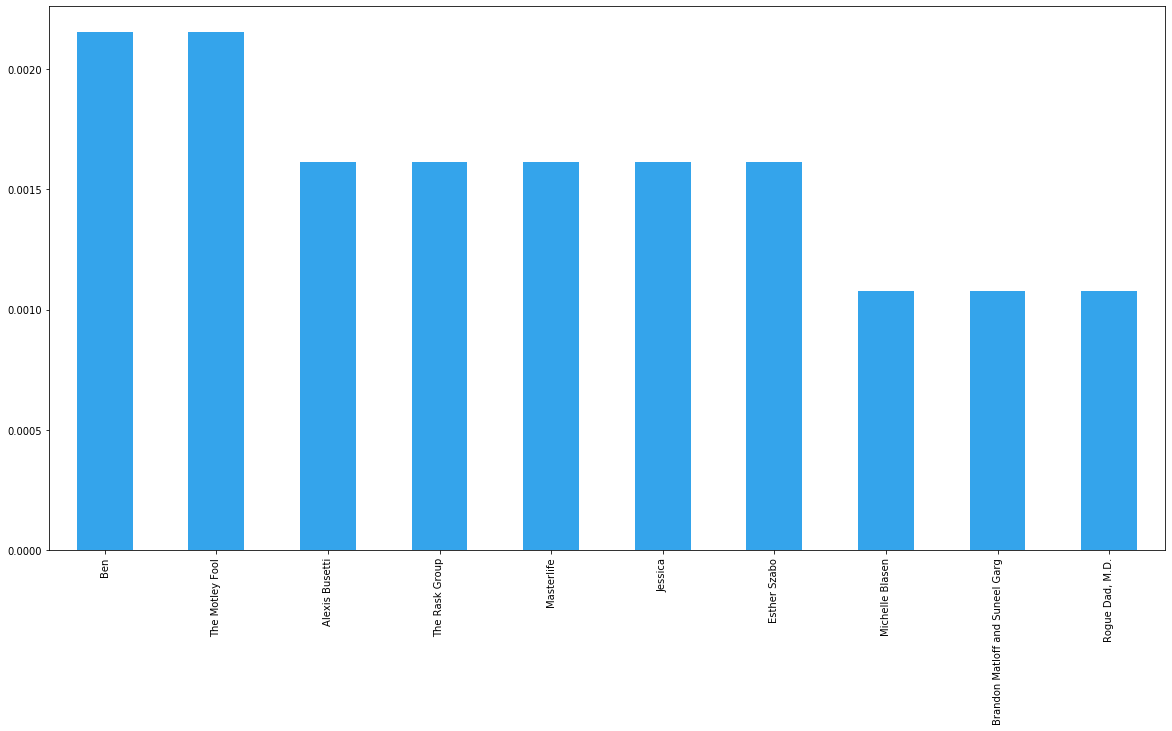

In [15]:
plt.figure(figsize=(20,10))
(pubs[:10]/en_podcasts.shape[0]).plot(kind='bar',color='#34a4eb')
plt.savefig('top_publishers.png');

In [16]:
show_list = list(en_podcasts['id'])
show_list

['5rlksOLniypAgBEkebMkoo',
 '54VydTdMDHkfqPqzlwRJFa',
 '6o8lC0CcRlIclZsbkEOaRL',
 '3oW8SnmePemy5pOsTTvQjY',
 '49an3JD6uAaqEw5qQS8tie',
 '08IF2pM2RjjZ6jxafHnmPp',
 '5hwcwChU0bWy1EFBNul7ld',
 '3iwRYmT3VIYrGC9NdRv2ya',
 '1OUBkO5jLr3xNL2CSQffKM',
 '4i7qGU4QdWzUAW7r1eikTr',
 '3it2z8lRV0aFAZn91w5ji8',
 '0onjxuheqNMfUHem407NcQ',
 '0KMmdHHBIfM809waVmIH9A',
 '1dX2DP25a9FS1larQotxAb',
 '5CteAGvyWcovE3g6XOjVS3',
 '6WQQLZdboT0222zRkQ6sSI',
 '3gb5XO5CbSn4ouIgRRYFoN',
 '43a0a8riEZsuvIpmmNKRPU',
 '5AjnvxZb6ZScoI6KCV0hxo',
 '3x0KIfFYItnhnrKKjBYZkd',
 '453DFwae3B8OgQwnRe7NvT',
 '51BxddTqep9w8nEYh2I0PD',
 '0aTm6LXx902TTSogM5Tepn',
 '6E3Dy4JpKAcFfFzHzug1Go',
 '7AURZ898TO93WIJw1dqhWf',
 '39bSKc5WQuwl4fqTM9cAWU',
 '41Jr8zIQ8igIsG3tkToheU',
 '6u9tRV7nDlwKD0chrplauG',
 '6MlcFCAJR1eqtKQelr6AzG',
 '4tXBOYY0WQbP4UQoj57gE6',
 '6036gj9sD6BHufQTE4XlUw',
 '6UQLb2UzNSkqSFE0I4Dw5i',
 '4y6LTdxKvLFD0twaLpdlhq',
 '48gBvvITKeSVDLmg35ooQx',
 '58yUyT6HyKAZqoDxrWN4e1',
 '2zCqujGj6lX7gOzYTq2gS2',
 '6RY7rbKk7E2GAbuZFum96h',
 

In [17]:
len(show_list)

1857

In [18]:
ep_id_list = []
ep_dur_list = []
ep_date_list = []
ep_name_list = []
ep_desc_list = []
show_id_list = []
audio_preview_url_list = []

for i in range(len(show_list)//4):
    id = show_list[i]
    type = 'episodes'
    market  = 'IN'
    limit = 50
    offset = 0

    counter = 0
    more_runs = 1

    while(counter <= more_runs):


        endpoint_url = f"https://api.spotify.com/v1/shows/{id}/episodes?"


        query = f'{endpoint_url}'
        query += f'&q={search}'
        query += f'&type={type}'
        query += f'&offset={offset}'
        query += f'&market={market}'
        query += f'&limit={limit}'


        response = requests.get(query, 
                       headers={"Content-Type":"application/json", 
                                "Authorization":f"Bearer {token}"})
        json_response = response.json()

        for i in range(len(json_response['items'])):
            show_id_list.append(id)
            ep_id_list.append(json_response['items'][i]['id'])
            ep_dur_list.append(json_response['items'][i]['duration_ms'])
            ep_date_list.append(json_response['items'][i]['release_date'])    
            ep_name_list.append(json_response['items'][i]['name'])
            ep_desc_list.append(json_response['items'][i]['description'])
            audio_preview_url_list.append(json_response['items'][i]['audio_preview_url'])


        more_runs = (json_response['total'] // 50 )         

        counter += 1

        offset = offset + 50

In [19]:
episodes = pd.DataFrame()

episodes['ep_id'] = ep_id_list
episodes['ep_duration'] = ep_dur_list
episodes['ep_release_date'] = ep_date_list
episodes['ep_name'] = ep_name_list
episodes['ep_description'] = ep_desc_list
episodes['ep_audio_preview_url'] = audio_preview_url_list
episodes['show_id'] = show_id_list

episodes

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_id
0,0ntJn4yJVV4umVjwnGKRgn,2624052,2020-07-15,Shadow Banking Scandal: Dollar Swap Lines,The most alarming interview you’ll listen to ...,https://p.scdn.co/mp3-preview/92fc516438c36aa2...,5rlksOLniypAgBEkebMkoo
1,55Fkq503PHqrk2sDFgSJkJ,2568620,2020-07-13,"Three Things Are Certain in Life: Death, Taxe...",Gold became money as determined by the free ma...,https://p.scdn.co/mp3-preview/891291d29d35578f...,5rlksOLniypAgBEkebMkoo
2,6mPZv163rYpSGxeU22jZMx,2126968,2020-07-08,Crypto Expert Predicts Bitcoin Will Hit 100k: ...,Bitcoin and other cryptocurrencies are now cha...,https://p.scdn.co/mp3-preview/8670aa67a8781cd1...,5rlksOLniypAgBEkebMkoo
3,6MmCicD7bBdyCX4eiGceCj,2214922,2020-07-01,How to Begin Writing Your Own Book—and Make Mo...,"In 1997, the book Rich Dad Poor Dad was self-p...",https://p.scdn.co/mp3-preview/fc9d04eb158ab211...,5rlksOLniypAgBEkebMkoo
4,0x5QHf5oHj0kszmhZ4mYSM,1625287,2020-06-29,Cutting America’s Dependence on China for Medi...,When the coronavirus pandemic struck in the Un...,https://p.scdn.co/mp3-preview/fba59ce64262e359...,5rlksOLniypAgBEkebMkoo
...,...,...,...,...,...,...,...
27849,3Ze8QJfFVtOq7K4t5MMdVN,2182060,2020-04-03,Almost Abstract Outdoor News - 3rd April 2020,We Get Outdoors decided to take things to a ne...,https://p.scdn.co/mp3-preview/694912c7e74c56aa...,51l9jW0oK963nzZyWrNrKU
27850,33g0vk9HRLErnQZqagv9fB,3453204,2020-03-31,How I survived 3 Naked and Afraid Challenges w...,"In this episode, EJ and Mark discuss how to su...",https://p.scdn.co/mp3-preview/bde07774ad150a70...,51l9jW0oK963nzZyWrNrKU
27851,6JfpyNA2Eoq49Kg3P3wUP8,778815,2020-03-30,COVID 19 - Get Outdoors Safely with Rob Yates,In this first episode We Get Outdoors co-found...,https://p.scdn.co/mp3-preview/2174eff0157e07e4...,51l9jW0oK963nzZyWrNrKU
27852,4jJLYKenuKJ39sxCTz6XRG,4007423,2020-03-24,How To Sail around the World with Sailing Magi...,This episode is brought to you by the We Get O...,https://p.scdn.co/mp3-preview/c86d6ea6d929b98e...,51l9jW0oK963nzZyWrNrKU


In [20]:
episodes.to_csv('fin_episodes.csv')